In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

np.set_printoptions(linewidth=np.inf, suppress=True, precision=2)

In [2]:
import mitosheet

In [3]:
import plotly.express as px
import plotly.offline as pyo
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import plotly.figure_factory as ff

pyo.init_notebook_mode(connected=True)

### Unstructured Variance, n_input = 12, n_output = 1

In [4]:
m = n_input = 12
s = n_output = 1

In [58]:
np.random.seed(0)
x_min = np.random.randint(1,101, m+s)
x_min

array([45, 48, 65, 68, 68, 10, 84, 22, 37, 88, 71, 89, 89])

In [60]:
np.random.seed(0)
delta_x = np.random.uniform(1,1000, m+s)
delta_x

array([549.26, 715.47, 603.16, 545.34, 424.23, 646.25, 438.15, 891.88, 963.7 , 384.06, 791.93, 529.37, 568.48])

In [61]:
x_max = x_min + delta_x
x_max

array([ 594.26,  763.47,  668.16,  613.34,  492.23,  656.25,  522.15,  913.88, 1000.7 ,  472.06,  862.93,  618.37,  657.48])

In [62]:
mean_q = (x_min + x_max)  * 0.5
mean_q

array([319.63, 405.74, 366.58, 340.67, 280.12, 333.12, 303.07, 467.94, 518.85, 280.03, 466.97, 353.68, 373.24])

In [63]:
std_max = (x_max - x_min) * 0.5 * (1/3)
std_max

array([ 91.54, 119.25, 100.53,  90.89,  70.71, 107.71,  73.02, 148.65, 160.62,  64.01, 131.99,  88.23,  94.75])

In [64]:
np.random.seed(0)
std_list = []

for i in std_max:
    std_list.append(np.random.uniform(0,i))

In [65]:
std_list

[50.240646555803664,
 85.28325388479718,
 60.593854536970724,
 49.52427810211898,
 29.954593402203933,
 69.56798670032248,
 31.95477868407705,
 132.5592664732889,
 154.78015547016477,
 24.5439687466476,
 104.49890540485873,
 46.66316687067395,
 53.819998887683944]

In [66]:
cov_matrix_int = []

for i in range(m + s):
    for j in range(m + s):
        
        if j>i:
            min_ = - std_list[i] *  std_list[j]
            max_ = std_list[i] *  std_list[j]
            
            cov_matrix_int.append((i, j, min_, max_)) 

In [67]:
cov_matrix_int[:3]

[(0, 1, -4284.685815554964, 4284.685815554964),
 (0, 2, -3044.2744292457264, 3044.2744292457264),
 (0, 3, -2488.131752059887, 2488.131752059887)]

In [68]:
len(cov_matrix_int)

78

In [69]:
cov_list = []
np.random.seed(1)

for i, el in enumerate(cov_matrix_int):
    n = np.random.uniform(el[2],el[3])
#    print(i)
#    if i>(len(cov_matrix_int)/2)-1:
#        if (cov_list[el[0]-1] * cov_list[el[1]-1] < 0) and  n < 0:
#            n = n   
#        else:
#            n=-n
    cov_list.append(n)
cov_list[:5]

[-711.0692789081354,
 1341.456443044959,
 -2487.562592830543,
 -594.9545009019555,
 -2469.2756776225015]

In [70]:
cov_matrix = np.zeros((m + s, m + s))
print(len(cov_matrix))
cov_matrix

13


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [71]:
k=0
l=0
for i in range(len(cov_matrix)):
    for j in range(len(cov_matrix)):
        if j>i:
            cov_matrix[i][j] = cov_matrix[j][i] = cov_list[k]
            k += 1
        if i == j:
            cov_matrix[i][j] = np.square(std_list[l]) 
            l += 1 
np.set_printoptions(suppress=True)
print(cov_matrix)

[[ 2524.12  -711.07  1341.46 -2487.56  -594.95 -2469.28 -1308.94 -4178.93 -2401.92  -254.59   407.58  -378.88  1001.65]
 [ -711.07  7273.23 -3054.57  3194.03 -2414.7   2022.76  -450.72  1326.99 -9493.9  -1263.86  5360.48  3726.98 -1712.75]
 [ 1341.46 -3054.57  3671.62  1154.27  1366.34  3326.84 -1606.93 -7404.88 -6193.14  1124.76 -5086.53  -446.14  2986.5 ]
 [-2487.56  3194.03  1154.27  2452.65    98.4   1322.15  -583.91  2448.72  5130.06 -1171.06  2589.11  2259.48  1322.92]
 [ -594.95 -2414.7   1366.34    98.4    897.28  -915.06   553.79 -3150.99  -483.17   600.8  -1292.07  -593.29 -1192.9 ]
 [-2469.28  2022.76  3326.84  1322.15  -915.06  4839.7  -2136.92  3298.4  -6210.23  -800.65  -122.52 -2899.8    555.01]
 [-1308.94  -450.72 -1606.93  -583.91   553.79 -2136.92  1021.11 -2992.85   883.4    313.34 -2655.8   -256.3    668.66]
 [-4178.93  1326.99 -7404.88  2448.72 -3150.99  3298.4  -2992.85 17571.96 -3521.66 -2928.48   994.5   2026.35   212.45]
 [-2401.92 -9493.9  -6193.14  5130.06  -

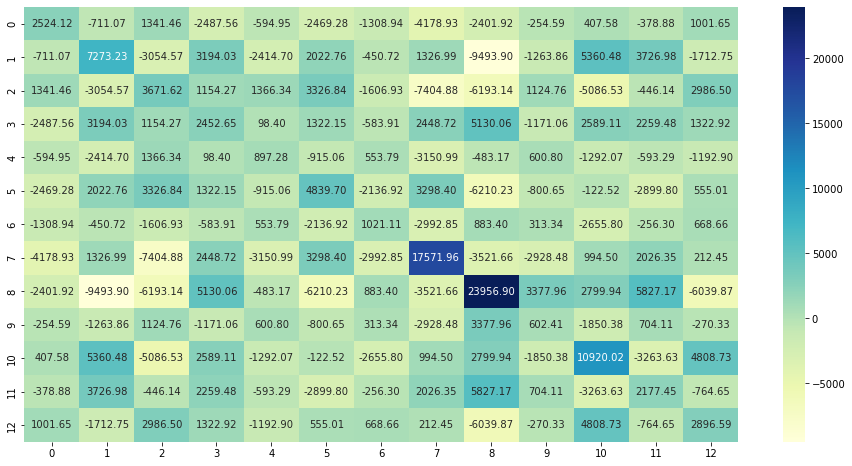

In [72]:
plt.figure(figsize = (16,8))
sns.heatmap(cov_matrix, annot=True, fmt='.2f', cmap='YlGnBu');

In [73]:
mask = np.triu(np.ones_like(cov_matrix, dtype=bool))
# mask[np.triu_indices_from(mask)] = True
mask

array([[ True,  True,  True,  True,  True,  True,  True,  True,  True,  True,  True,  True,  True],
       [False,  True,  True,  True,  True,  True,  True,  True,  True,  True,  True,  True,  True],
       [False, False,  True,  True,  True,  True,  True,  True,  True,  True,  True,  True,  True],
       [False, False, False,  True,  True,  True,  True,  True,  True,  True,  True,  True,  True],
       [False, False, False, False,  True,  True,  True,  True,  True,  True,  True,  True,  True],
       [False, False, False, False, False,  True,  True,  True,  True,  True,  True,  True,  True],
       [False, False, False, False, False, False,  True,  True,  True,  True,  True,  True,  True],
       [False, False, False, False, False, False, False,  True,  True,  True,  True,  True,  True],
       [False, False, False, False, False, False, False, False,  True,  True,  True,  True,  True],
       [False, False, False, False, False, False, False, False, False,  True,  True,  True,  True],


In [74]:
pd.DataFrame(cov_matrix).mask(~mask).T

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,2524.122566,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-711.069279,7273.233393,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1341.456443,-3054.569391,3671.615208,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,-2487.562593,3194.027243,1154.269144,2452.654122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,-594.954501,-2414.695123,1366.341008,98.400048,897.277666,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8,-2401.918363,-9493.896514,-6193.140206,5130.062830,-483.170474,-6210.229130,883.404229,-3521.661206,23956.896527,NaN,NaN,NaN,NaN
9,-254.593058,-1263.861597,1124.757402,-1171.062715,600.802590,-800.646197,313.339801,-2928.480290,3377.959197,602.406402,NaN,NaN,NaN
10,407.582894,5360.475210,-5086.528847,2589.110153,-1292.067158,-122.522530,-2655.801083,994.495442,2799.944220,-1850.380940,10920.021231,NaN,NaN
11,-378.878769,3726.975085,-446.136561,2259.476505,-593.285158,-2899.804906,-256.304153,2026.347837,5827.166664,704.110061,-3263.633099,2177.451142,NaN


In [75]:
pd.DataFrame(cov_matrix).mask(mask).to_numpy()

array([[     nan,      nan,      nan,      nan,      nan,      nan,      nan,      nan,      nan,      nan,      nan,      nan,      nan],
       [ -711.07,      nan,      nan,      nan,      nan,      nan,      nan,      nan,      nan,      nan,      nan,      nan,      nan],
       [ 1341.46, -3054.57,      nan,      nan,      nan,      nan,      nan,      nan,      nan,      nan,      nan,      nan,      nan],
       [-2487.56,  3194.03,  1154.27,      nan,      nan,      nan,      nan,      nan,      nan,      nan,      nan,      nan,      nan],
       [ -594.95, -2414.7 ,  1366.34,    98.4 ,      nan,      nan,      nan,      nan,      nan,      nan,      nan,      nan,      nan],
       [-2469.28,  2022.76,  3326.84,  1322.15,  -915.06,      nan,      nan,      nan,      nan,      nan,      nan,      nan,      nan],
       [-1308.94,  -450.72, -1606.93,  -583.91,   553.79, -2136.92,      nan,      nan,      nan,      nan,      nan,      nan,      nan],
       [-4178.93,  1326.99,

In [76]:
my_colorsc=[[0, '#2effd7'],#white
            [1, '#006a55']]

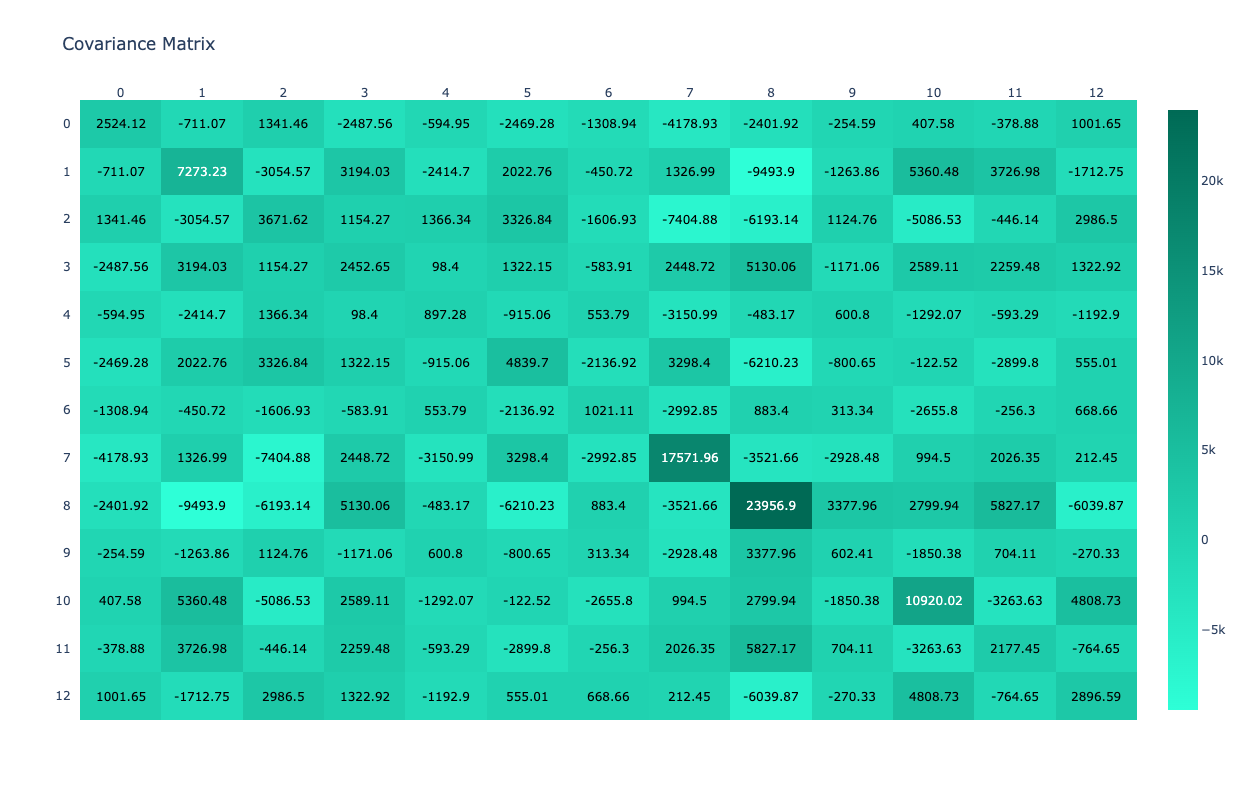

In [77]:
fig = ff.create_annotated_heatmap(pd.DataFrame(cov_matrix).to_numpy().T.round(2),
                                  x = pd.DataFrame(cov_matrix).columns.tolist(),
                                  y = pd.DataFrame(cov_matrix).columns.tolist(),
                                  showscale=True, colorscale=my_colorsc )

fig.update_layout(
    autosize=False,
    width=1200,
    height=800,
    title_text="Covariance Matrix",
        xaxis_showgrid=False,
    yaxis_showgrid=False,
    xaxis_zeroline=False,
    yaxis_zeroline=False,
    yaxis_autorange='reversed',
    template='plotly_white'
)

for i in range(len(fig.layout.annotations)):
    if fig.layout.annotations[i].text == 'nan':
        fig.layout.annotations[i].text = ""

fig.show()

In [81]:
np.random.seed(0)
US_15 = pd.DataFrame(np.random.multivariate_normal(mean_q, cov_matrix, 1000))
US_15.columns = ["Input " + str(i + 1).zfill(2) for i in range(m)] + ["Output " + str(i + 1).zfill(2) for i in range(s)]
US_15.index = ["DMU " + str(i + 1).zfill(4) for i in range(len(US_15))]
US_15 = US_15.round(2)
US_15.head()

/var/folders/6l/c4m0953s1_jgnd_y35l2l7kc0000gp/T/ipykernel_4624/3092505418.py:2: RuntimeWarning:

covariance is not positive-semidefinite.



,Input 01,Input 02,Input 03,Input 04,Input 05,Input 06,Input 07,Input 08,Input 09,Input 10,Input 11,Input 12,Output 01
DMU 0001,259.95,26.99,322.28,414.97,255.92,383.36,262.02,398.68,740.38,366.10,422.55,385.88,345.92
DMU 0002,319.14,302.63,403.86,248.25,257.95,425.81,335.21,461.84,557.88,324.84,473.78,171.62,283.35
DMU 0003,210.48,253.56,379.44,217.90,266.49,413.17,314.84,592.83,535.13,267.79,416.10,280.23,281.03
DMU 0004,224.87,534.94,248.12,505.97,257.01,326.70,373.96,437.16,408.53,279.36,678.56,434.99,258.31
DMU 0005,313.11,441.90,309.82,352.94,315.86,378.75,321.04,647.50,469.54,227.30,573.18,346.82,367.04


In [82]:
(US_15<=0).sum()

Input 01     0
Input 02     0
Input 03     0
Input 04     0
Input 05     0
Input 06     0
Input 07     0
Input 08     0
Input 09     0
Input 10     0
Input 11     0
Input 12     0
Output 01    0
dtype: int64

In [85]:
#US_15.to_excel("Data/US12I1O_1.xlsx")

In [86]:
df = pd.read_excel("Data/US12I1O_1.xlsx", index_col = 0)
df

,Input 01,Input 02,Input 03,Input 04,Input 05,Input 06,Input 07,Input 08,Input 09,Input 10,Input 11,Input 12,Output 01
DMU 0001,259.95,26.99,322.28,414.97,255.92,383.36,262.02,398.68,740.38,366.10,422.55,385.88,345.92
DMU 0002,319.14,302.63,403.86,248.25,257.95,425.81,335.21,461.84,557.88,324.84,473.78,171.62,283.35
DMU 0003,210.48,253.56,379.44,217.90,266.49,413.17,314.84,592.83,535.13,267.79,416.10,280.23,281.03
DMU 0004,224.87,534.94,248.12,505.97,257.01,326.70,373.96,437.16,408.53,279.36,678.56,434.99,258.31
DMU 0005,313.11,441.90,309.82,352.94,315.86,378.75,321.04,647.50,469.54,227.30,573.18,346.82,367.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...
DMU 0996,305.43,121.13,369.15,367.48,194.77,402.71,271.16,332.64,448.07,343.58,313.74,526.46,249.40
DMU 0997,282.25,283.29,394.13,239.27,276.72,461.29,247.40,534.89,530.83,214.59,535.04,299.25,340.64
DMU 0998,228.60,333.80,223.02,271.56,235.06,372.41,373.23,714.65,654.52,265.99,570.89,330.29,304.67
DMU 0999,319.08,503.35,363.94,327.48,290.26,500.75,280.84,557.95,171.83,196.89,539.86,342.50,411.74


In [87]:
df.min()

Input 01      69.28
Input 02      26.99
Input 03      42.50
Input 04     113.04
Input 05     113.41
Input 06     105.95
Input 07     121.88
Input 08      16.59
Input 09       5.75
Input 10     147.02
Input 11      54.82
Input 12     102.86
Output 01    134.95
dtype: float64